<a href="https://colab.research.google.com/github/gabrie1-s/phosphorus_analysis/blob/main/C%C3%B3pia_de_Analise_fosforo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importação das bibliotecas e leitura dos dados

In [ ]:
%%capture
!pip install Bayesian-Optimization
!pip install xgboost
!pip install ray

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics
import math
import random
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
import os
import gc
import pdb
import ray
import keras
import xgboost
import tensorflow
from scipy import stats
from sklearn import metrics
from xgboost import XGBRegressor
from keras.models import load_model
from bayes_opt import BayesianOptimization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.graph_objects as go

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
fosforo = pd.read_excel("/content/drive/MyDrive/CNN_Chagas/fosforo/Dados_B1_B7.xlsx")

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
fosforo

,TOA B1,TOA B2,TOA B3,TOA B4,TOA B5,TOA B6,TOA B7,P medido (mg/L)
0,29.5835,33.4172,40.1310,9.8038,17.8349,3.8763,1.2581,0.312143
1,29.5860,32.3914,36.8628,28.3816,16.6043,3.7379,1.2204,0.299000
2,30.1162,33.4923,38.7866,28.9411,17.8240,3.8617,1.2464,0.141143
3,29.4667,33.8746,40.8503,29.5920,17.6618,3.7854,1.2231,0.303714
4,30.6845,34.1537,38.8822,30.0438,18.4973,3.9169,1.2551,0.141000
5,45.6215,52.6813,62.4212,48.5056,28.0955,6.6208,2.0224,0.105000
6,30.6840,32.1027,32.9215,25.8750,16.4034,3.8543,1.2500,0.010000
7,29.3897,31.5916,33.0158,27.0334,16.5559,3.9747,1.2844,0.010000
8,28.7015,29.9586,29.8104,24.3255,15.1438,3.6037,1.1841,0.068000
9,30.1640,32.1973,32.1590,25.7599,16.1637,3.8129,1.2419,0.049000


In [ ]:
fosforo.columns = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'P']

In [ ]:
dataset = fosforo[fosforo.columns[:7]]

In [ ]:
target = fosforo['P']

# 2. Histogramas

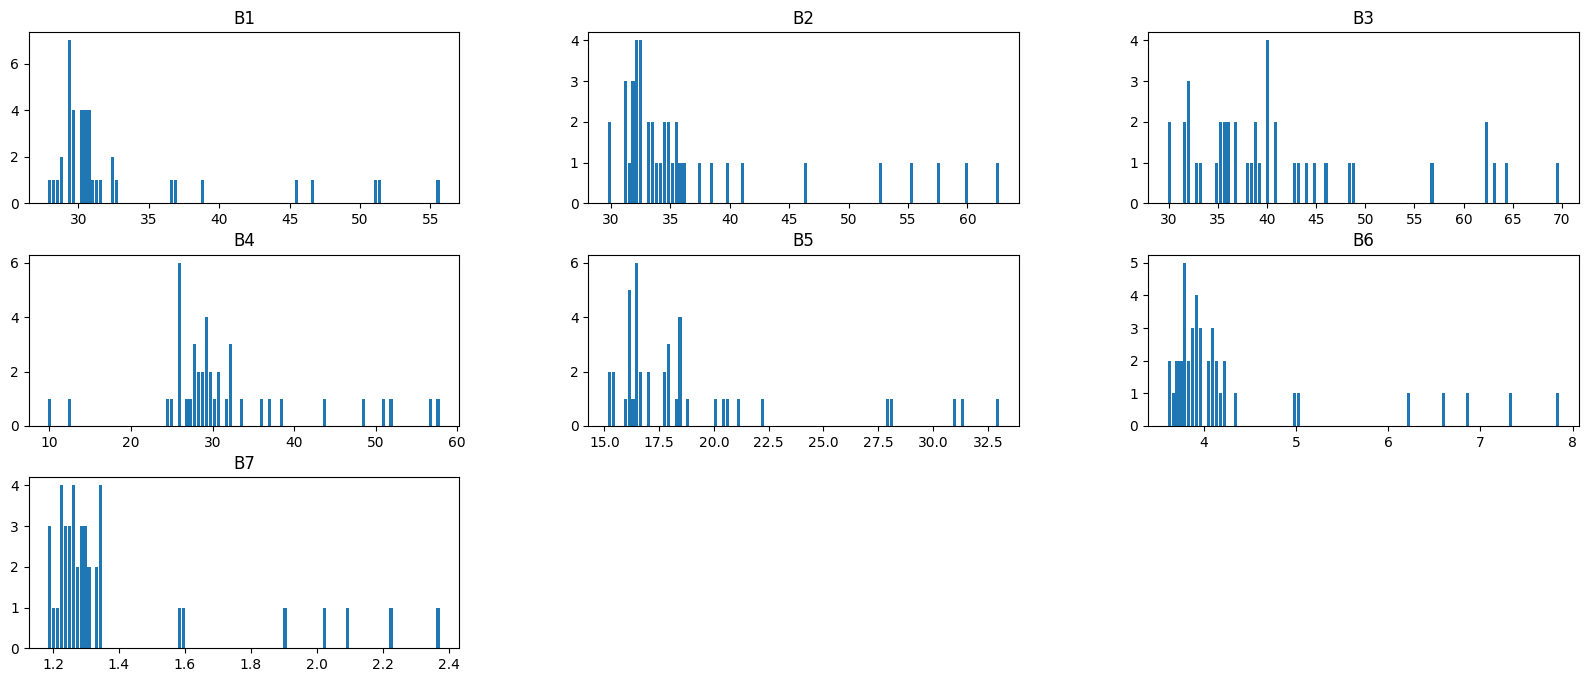

In [ ]:
dataset.hist(
    figsize=(20, 8),
    grid = False,
    rwidth = 0.8,
    bins = 100
)
plt.show()

In [ ]:
dataset.skew()

B1    2.202681
B2    2.021795
B3    1.406842
B4    0.991740
B5    2.011601
B6    2.300812
B7    2.306189
dtype: float64

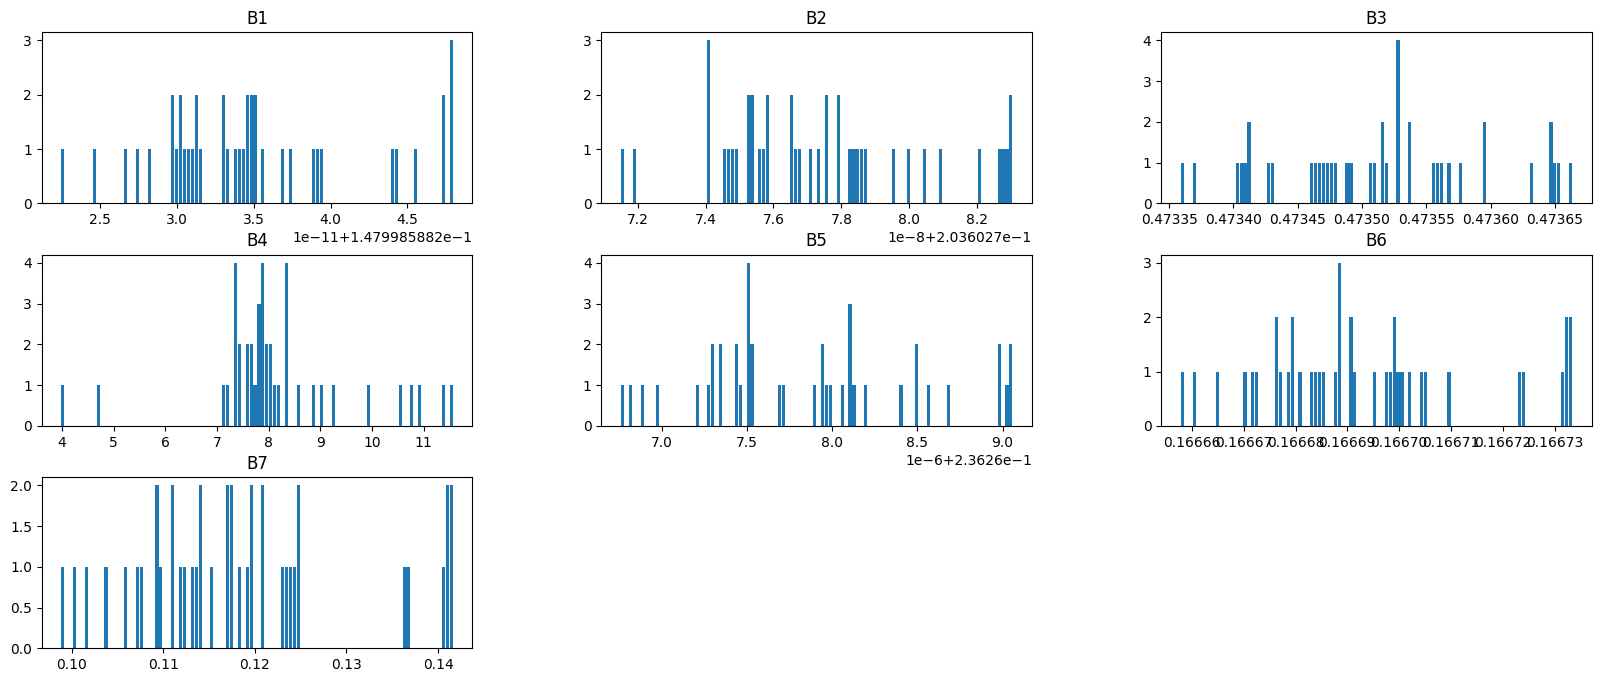

In [ ]:
test_data = dataset.copy()
lbs = []

for col in test_data.columns:
  test_data[col], l = stats.boxcox(test_data[col])[0:2]
  lbs.append(l)
test_data.hist(
    figsize=(20, 8),
    grid = False,
    rwidth = 0.8,
    bins = 100
)
plt.show()

# 2. Remoção de outliers

In [ ]:
def outliers_treatment(dataset, target, method='remotion', median_p_dist=0.1, target_dist=0.1):
  if method == 'median':
    for i, p1 in enumerate(target):
      similar = [i]
      for j, p2 in enumerate(target):
        if abs(p1-p2) < target_dist*p1:
          similar.append(j)

      for k in range(len(dataset.columns)):
        for j in similar:
          if abs(dataset.iloc[i, k] - dataset.iloc[j, k]) > median_p_dist*dataset.iloc[i, k]:
            dataset.iloc[i, k] = statistics.median([dataset.iloc[c, k] for c in similar])
            dataset.iloc[j, k] = statistics.median([dataset.iloc[c, k] for c in similar])


  elif method == 'remotion':
    to_drop = []
    for i, p1 in enumerate(target):
      similar = [i]
      for j, p2 in enumerate(target):
        if abs(p1-p2) < target_dist*p1:
          similar.append(j)

      for k in range(len(dataset.columns)):
        if abs(dataset.iloc[i, k] - statistics.median([dataset.iloc[c, k] for c in similar])) >  median_p_dist*dataset.iloc[i, k]:
          to_drop.append(i)
          break

    dataset = dataset.drop(index=to_drop)
    dataset.reset_index(drop=True, inplace=True)
    target = target.drop(index=to_drop)
    target.reset_index(drop=True, inplace=True)

  return dataset, target


In [ ]:
dataset, target = outliers_treatment(dataset, target, method='remotion', median_p_dist=0.1)

In [ ]:
dataset

,B1,B2,B3,B4,B5,B6,B7
0,29.5860,32.3914,36.8628,28.3816,16.6043,3.7379,1.2204
1,30.1162,33.4923,38.7866,28.9411,17.8240,3.8617,1.2464
2,29.4667,33.8746,40.8503,29.5920,17.6618,3.7854,1.2231
3,30.6845,34.1537,38.8822,30.0438,18.4973,3.9169,1.2551
4,30.6840,32.1027,32.9215,25.8750,16.4034,3.8543,1.2500
5,29.3897,31.5916,33.0158,27.0334,16.5559,3.9747,1.2844
6,30.1640,32.1973,32.1590,25.7599,16.1637,3.8129,1.2419
7,30.0888,31.7055,31.7910,25.7599,16.1637,3.8129,1.2419
8,29.2660,31.2224,32.1123,26.0156,16.0711,3.8806,1.2598
9,30.3861,32.6117,35.4681,27.2313,16.5703,3.7781,1.2350


# 2. Relações Polinomiais

In [ ]:
for i in dataset.columns:
  dataset['ln('+str(i)+')'] = np.log(dataset[i])

for i in dataset.columns:
  dataset['1/' + str(i)] = 1/dataset[i]

In [ ]:
dataset

,B1,B2,B3,B4,B5,B6,B7,ln(B1),ln(B2),ln(B3),ln(B4),ln(B5),ln(B6),ln(B7),1/B1,1/B2,1/B3,1/B4,1/B5,1/B6,1/B7,1/ln(B1),1/ln(B2),1/ln(B3),1/ln(B4),1/ln(B5),1/ln(B6),1/ln(B7)
0,29.5860,32.3914,36.8628,28.3816,16.6043,3.7379,1.2204,3.387301,3.477893,3.607203,3.345741,2.809662,1.318524,0.199179,0.033800,0.030872,0.027128,0.035234,0.060225,0.267530,0.819403,0.295220,0.287530,0.277223,0.298887,0.355915,0.758424,5.020618
1,30.1162,33.4923,38.7866,28.9411,17.8240,3.8617,1.2464,3.405063,3.511316,3.658075,3.365263,2.880546,1.351108,0.220259,0.033205,0.029858,0.025782,0.034553,0.056104,0.258953,0.802311,0.293680,0.284794,0.273368,0.297154,0.347156,0.740134,4.540101
2,29.4667,33.8746,40.8503,29.5920,17.6618,3.7854,1.2231,3.383261,3.522665,3.709914,3.387504,2.871404,1.331152,0.201389,0.033937,0.029521,0.024480,0.033793,0.056619,0.264173,0.817595,0.295573,0.283876,0.269548,0.295203,0.348262,0.751229,4.965524
3,30.6845,34.1537,38.8822,30.0438,18.4973,3.9169,1.2551,3.423758,3.530871,3.660537,3.402656,2.917625,1.365301,0.227215,0.032590,0.029279,0.025719,0.033285,0.054062,0.255304,0.796749,0.292077,0.283216,0.273184,0.293888,0.342745,0.732439,4.401113
4,30.6840,32.1027,32.9215,25.8750,16.4034,3.8543,1.2500,3.423741,3.468940,3.494126,3.253277,2.797489,1.349189,0.223144,0.032590,0.031150,0.030375,0.038647,0.060963,0.259450,0.800000,0.292078,0.288272,0.286195,0.307382,0.357463,0.741186,4.481420
5,29.3897,31.5916,33.0158,27.0334,16.5559,3.9747,1.2844,3.380644,3.452891,3.496986,3.297073,2.806743,1.379949,0.250292,0.034026,0.031654,0.030289,0.036991,0.060401,0.251591,0.778574,0.295802,0.289612,0.285961,0.303299,0.356285,0.724664,3.995339
6,30.1640,32.1973,32.1590,25.7599,16.1637,3.8129,1.2419,3.406649,3.471883,3.470692,3.248819,2.782768,1.338390,0.216642,0.033152,0.031059,0.031095,0.038820,0.061867,0.262268,0.805218,0.293544,0.288028,0.288127,0.307804,0.359354,0.747166,4.615900
7,30.0888,31.7055,31.7910,25.7599,16.1637,3.8129,1.2419,3.404153,3.456490,3.459183,3.248819,2.782768,1.338390,0.216642,0.033235,0.031540,0.031455,0.038820,0.061867,0.262268,0.805218,0.293759,0.289311,0.289086,0.307804,0.359354,0.747166,4.615900
8,29.2660,31.2224,32.1123,26.0156,16.0711,3.8806,1.2598,3.376426,3.441136,3.469239,3.258696,2.777023,1.355990,0.230953,0.034169,0.032028,0.031141,0.038438,0.062223,0.257692,0.793777,0.296171,0.290602,0.288248,0.306871,0.360098,0.737469,4.329886
9,30.3861,32.6117,35.4681,27.2313,16.5703,3.7781,1.2350,3.413985,3.484671,3.568634,3.304367,2.807612,1.329221,0.211071,0.032910,0.030664,0.028194,0.036722,0.060349,0.264683,0.809717,0.292913,0.286971,0.280219,0.302630,0.356175,0.752320,4.737743


In [ ]:
poly = PolynomialFeatures(degree=9, include_bias=False)
poly_features = poly.fit_transform(dataset)
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(dataset.columns))

# 2. Seleção por Correlação

In [ ]:
def one_side_corr(data, target, method='spearman', target_corr=0.5, variables_corr=0.5):
    other_columns = [col for col in data.columns if col != target]
    values = []
    accepted_cols = []
    accepted_values = []
    for col in other_columns:
      corr_value = data[target].corr(data[col], method=method)
      if corr_value > target_corr:
        values.append((col, corr_value))

    values = sorted(values, key=lambda x: x[1], reverse=True)
    accepted_cols.append(values[0][0])
    accepted_values.append(values[0])

    for i in values:
      count = 0
      for col_acc in accepted_cols:
        if abs(data[col_acc].corr(data[i[0]], method=method)) > variables_corr:
          count += 1
          break
      if count == 0:
        accepted_cols.append(i[0])
        accepted_values.append(i)

    return accepted_values

In [ ]:
poly_df['P'] = target
poly_corr = one_side_corr(poly_df, 'P',method="spearman", target_corr=0.6, variables_corr=0.9)

In [ ]:
poly_corr

[('B2 B5 ln(B2) 1/B1 1/B7 1/ln(B3)', 0.8211382363021221),
 ('B5 B7^3 1/B1 1/ln(B7)', 0.6614929986412236),
 ('B4 ln(B3) ln(B4) ln(B5) 1/B3 1/B7', 0.6550874798461875),
 ('B1 B2^2 1/B6^2 1/ln(B2)', 0.6331608962785641),
 ('B4 ln(B5)^3 1/ln(B1) 1/ln(B2)', 0.6208425909034947),
 ('B1 B5^2 1/B2 1/B7 1/ln(B3)', 0.6112343127109405),
 ('B3 ln(B6)^3 1/B1 1/ln(B7)', 0.6065533566684144),
 ('B6^2 B7 ln(B1) ln(B6) 1/ln(B7)', 0.6021187667333894),
 ('B5^2 1/B1 1/ln(B2)^2 1/ln(B6)', 0.5875831663908075),
 ('B5 ln(B2) ln(B4)^2 1/B4 1/B7', 0.5777285220907521),
 ('B3 B6 1/B4 1/ln(B6)', 0.5772357898757493),
 ('B2 ln(B6) 1/B7 1/ln(B1)^2 1/ln(B3)', 0.5720621016182202),
 ('B1 B5 B6 B7 1/ln(B3) 1/ln(B7)', 0.526730737837965),
 ('B2^2 1/B1^2 1/ln(B3)', 0.5237743445479484),
 ('B2^2 1/B1 1/ln(B3) 1/ln(B4)', 0.5220497817954386),
 ('B2 B5 1/B1 1/ln(B1) 1/ln(B3)^2', 0.5158906291079038),
 ('B2^2 B4 1/B1 1/B5 1/B6', 0.5072678153453554)]

In [ ]:
poly_df = poly_df[[x[0] for x in poly_corr]]

In [ ]:
y = target
x = poly_df

# 2.PCA

In [ ]:
# scaler = StandardScaler()
# x_scaled = scaler.fit_transform(x)
pca = PCA()
x_pca = pca.fit_transform(poly_df)

In [ ]:
cumulative_variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

val = list(range(1, len(cumulative_variance)+1))
fig = go.Figure(data=go.Scatter(x = val, y = cumulative_variance, mode='lines+markers'))
fig.update_layout(
    xaxis=dict(title='PCs', dtick=10 ,showgrid=True),
    yaxis=dict(title='Cumulative variance',  dtick=10, showgrid=True)
)
fig.show()

In [ ]:
x = pd.DataFrame()
y = target

for i, val in enumerate(np.transpose(x_pca[:, :41])[0:]):
  x['pc_' + str(i+1)] = val

# 2. Divisão treino/teste

In [ ]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.15, random_state=3)

# 3. Seleção de variáveis

## 3.1. Boruta

In [ ]:
%%capture
!pip install BorutaShap
!pip install xgboost
!pip install lightgbm
!pip install catboost

In [ ]:
import catboost as cb
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from BorutaShap import BorutaShap, load_data
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import GridSearchCV
from  sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

### Random Forest

In [ ]:
forest = RandomForestRegressor(
   n_jobs = -1, n_estimators=200
)

Feature_Selector = BorutaShap(model=forest,
                              importance_measure='shap',
                              classification=False)

Feature_Selector.fit(X=x_tr, y=y_tr, n_trials=100, random_state=0)

  0%|          | 0/100 [00:00<?, ?it/s]

3 attributes confirmed important: ['B5^2 1/B1 1/ln(B2)^2 1/ln(B6)', 'B4 ln(B3) ln(B4) ln(B5) 1/B3 1/B7', 'B2 B5 ln(B2) 1/B1 1/B7 1/ln(B3)']
14 attributes confirmed unimportant: ['B3 B6 1/B4 1/ln(B6)', 'B2 B5 1/B1 1/ln(B1) 1/ln(B3)^2', 'B2^2 1/B1^2 1/ln(B3)', 'B6^2 B7 ln(B1) ln(B6) 1/ln(B7)', 'B1 B2^2 1/B6^2 1/ln(B2)', 'B3 ln(B6)^3 1/B1 1/ln(B7)', 'B1 B5^2 1/B2 1/B7 1/ln(B3)', 'B5 ln(B2) ln(B4)^2 1/B4 1/B7', 'B4 ln(B5)^3 1/ln(B1) 1/ln(B2)', 'B2 ln(B6) 1/B7 1/ln(B1)^2 1/ln(B3)', 'B1 B5 B6 B7 1/ln(B3) 1/ln(B7)', 'B2^2 B4 1/B1 1/B5 1/B6', 'B5 B7^3 1/B1 1/ln(B7)', 'B2^2 1/B1 1/ln(B3) 1/ln(B4)']
0 tentative attributes remains: []


In [ ]:
['B5^2 1/B1 1/ln(B2)^2 1/ln(B6)', 'B4 ln(B3) ln(B4) ln(B5) 1/B3 1/B7', 'B2 B5 ln(B2) 1/B1 1/B7 1/ln(B3)']
['B4 ln(B3) ln(B4) ln(B5) 1/B3 1/B7', 'B2 B5 ln(B2) 1/B1 1/B7 1/ln(B3)']
['B5^2 1/B1 1/ln(B2)^2 1/ln(B6)', 'B4 ln(B3) ln(B4) ln(B5) 1/B3 1/B7', 'B2 B5 ln(B2) 1/B1 1/B7 1/ln(B3)']
['B4 ln(B3) ln(B4) ln(B5) 1/B3 1/B7', 'B2 B5 ln(B2) 1/B1 1/B7 1/ln(B3)']

### Gradient Boosting

In [ ]:
gb = GradientBoostingRegressor(
   n_estimators=200
)

Feature_Selector = BorutaShap(model=gb,
                              importance_measure='shap',
                              classification=False)

Feature_Selector.fit(X=x_tr, y=y_tr, n_trials=100, random_state=0)

  0%|          | 0/100 [00:00<?, ?it/s]

2 attributes confirmed important: ['B4 ln(B3) ln(B4) ln(B5) 1/B3 1/B7', 'B2 B5 ln(B2) 1/B1 1/B7 1/ln(B3)']
15 attributes confirmed unimportant: ['B3 B6 1/B4 1/ln(B6)', 'B2 B5 1/B1 1/ln(B1) 1/ln(B3)^2', 'B5^2 1/B1 1/ln(B2)^2 1/ln(B6)', 'B2^2 1/B1^2 1/ln(B3)', 'B6^2 B7 ln(B1) ln(B6) 1/ln(B7)', 'B1 B2^2 1/B6^2 1/ln(B2)', 'B3 ln(B6)^3 1/B1 1/ln(B7)', 'B1 B5^2 1/B2 1/B7 1/ln(B3)', 'B5 ln(B2) ln(B4)^2 1/B4 1/B7', 'B4 ln(B5)^3 1/ln(B1) 1/ln(B2)', 'B2 ln(B6) 1/B7 1/ln(B1)^2 1/ln(B3)', 'B1 B5 B6 B7 1/ln(B3) 1/ln(B7)', 'B2^2 B4 1/B1 1/B5 1/B6', 'B5 B7^3 1/B1 1/ln(B7)', 'B2^2 1/B1 1/ln(B3) 1/ln(B4)']
0 tentative attributes remains: []


### CatBoost

In [ ]:
ctb = CatBoostRegressor(iterations=200)

# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(model=ctb,
                              importance_measure='shap',
                              classification=False)

Feature_Selector.fit(X=x_tr, y=y_tr, n_trials=100, random_state=0)

  0%|          | 0/100 [00:00<?, ?it/s]

3 attributes confirmed important: ['B5^2 1/B1 1/ln(B2)^2 1/ln(B6)', 'B4 ln(B3) ln(B4) ln(B5) 1/B3 1/B7', 'B2 B5 ln(B2) 1/B1 1/B7 1/ln(B3)']
14 attributes confirmed unimportant: ['B3 B6 1/B4 1/ln(B6)', 'B2 B5 1/B1 1/ln(B1) 1/ln(B3)^2', 'B2^2 1/B1^2 1/ln(B3)', 'B6^2 B7 ln(B1) ln(B6) 1/ln(B7)', 'B1 B2^2 1/B6^2 1/ln(B2)', 'B3 ln(B6)^3 1/B1 1/ln(B7)', 'B1 B5^2 1/B2 1/B7 1/ln(B3)', 'B5 ln(B2) ln(B4)^2 1/B4 1/B7', 'B4 ln(B5)^3 1/ln(B1) 1/ln(B2)', 'B2 ln(B6) 1/B7 1/ln(B1)^2 1/ln(B3)', 'B1 B5 B6 B7 1/ln(B3) 1/ln(B7)', 'B2^2 B4 1/B1 1/B5 1/B6', 'B5 B7^3 1/B1 1/ln(B7)', 'B2^2 1/B1 1/ln(B3) 1/ln(B4)']
0 tentative attributes remains: []


### XGBoost

In [ ]:
xgb = XGBRegressor(n_estimators=200)

# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(model=xgb,
                              importance_measure='shap',
                              classification=False)

Feature_Selector.fit(X=x_tr, y=y_tr, n_trials=100, random_state=0)

  0%|          | 0/100 [00:00<?, ?it/s]

2 attributes confirmed important: ['B4 ln(B3) ln(B4) ln(B5) 1/B3 1/B7', 'B2 B5 ln(B2) 1/B1 1/B7 1/ln(B3)']
15 attributes confirmed unimportant: ['B3 B6 1/B4 1/ln(B6)', 'B2 B5 1/B1 1/ln(B1) 1/ln(B3)^2', 'B5^2 1/B1 1/ln(B2)^2 1/ln(B6)', 'B2^2 1/B1^2 1/ln(B3)', 'B6^2 B7 ln(B1) ln(B6) 1/ln(B7)', 'B1 B2^2 1/B6^2 1/ln(B2)', 'B3 ln(B6)^3 1/B1 1/ln(B7)', 'B1 B5^2 1/B2 1/B7 1/ln(B3)', 'B5 ln(B2) ln(B4)^2 1/B4 1/B7', 'B4 ln(B5)^3 1/ln(B1) 1/ln(B2)', 'B2 ln(B6) 1/B7 1/ln(B1)^2 1/ln(B3)', 'B1 B5 B6 B7 1/ln(B3) 1/ln(B7)', 'B2^2 B4 1/B1 1/B5 1/B6', 'B5 B7^3 1/B1 1/ln(B7)', 'B2^2 1/B1 1/ln(B3) 1/ln(B4)']
0 tentative attributes remains: []


In [ ]:
x_tr = x_tr[['B5^2 1/B1 1/ln(B2)^2 1/ln(B6)', 'B4 ln(B3) ln(B4) ln(B5) 1/B3 1/B7', 'B2 B5 ln(B2) 1/B1 1/B7 1/ln(B3)']]
x_te = x_te[['B5^2 1/B1 1/ln(B2)^2 1/ln(B6)', 'B4 ln(B3) ln(B4) ln(B5) 1/B3 1/B7', 'B2 B5 ln(B2) 1/B1 1/B7 1/ln(B3)']]
df = x[['B5^2 1/B1 1/ln(B2)^2 1/ln(B6)', 'B4 ln(B3) ln(B4) ln(B5) 1/B3 1/B7', 'B2 B5 ln(B2) 1/B1 1/B7 1/ln(B3)']].copy()
df['P'] = y

In [ ]:
eigenvectors = pca.components_
eigenvectors = [eigenvectors[1]]
variables = poly_df.columns  # Adjust this based on your actual variable names

for i, comp in enumerate(eigenvectors):
    terms = [f"{comp[j]:.3f}*{variables[j]}" for j in range(len(variables)) if round(comp[j],3) != 0]
    formula = " + ".join(terms)
    print(f"Principal Component {i+1}: {formula}")

## 2.1. Teste de componentes polinomiais por meio de correlação de Spearmen

##2.4. Análise bivariada / correlações entre os dados

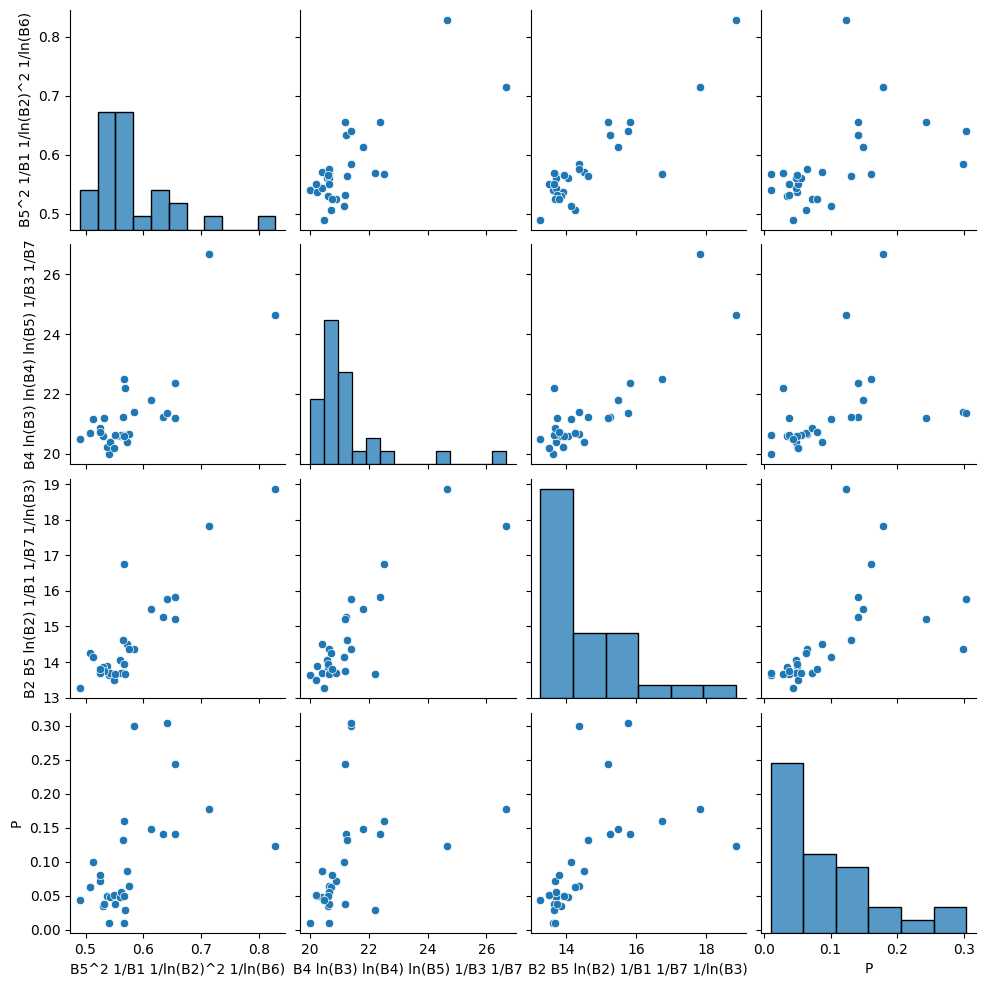

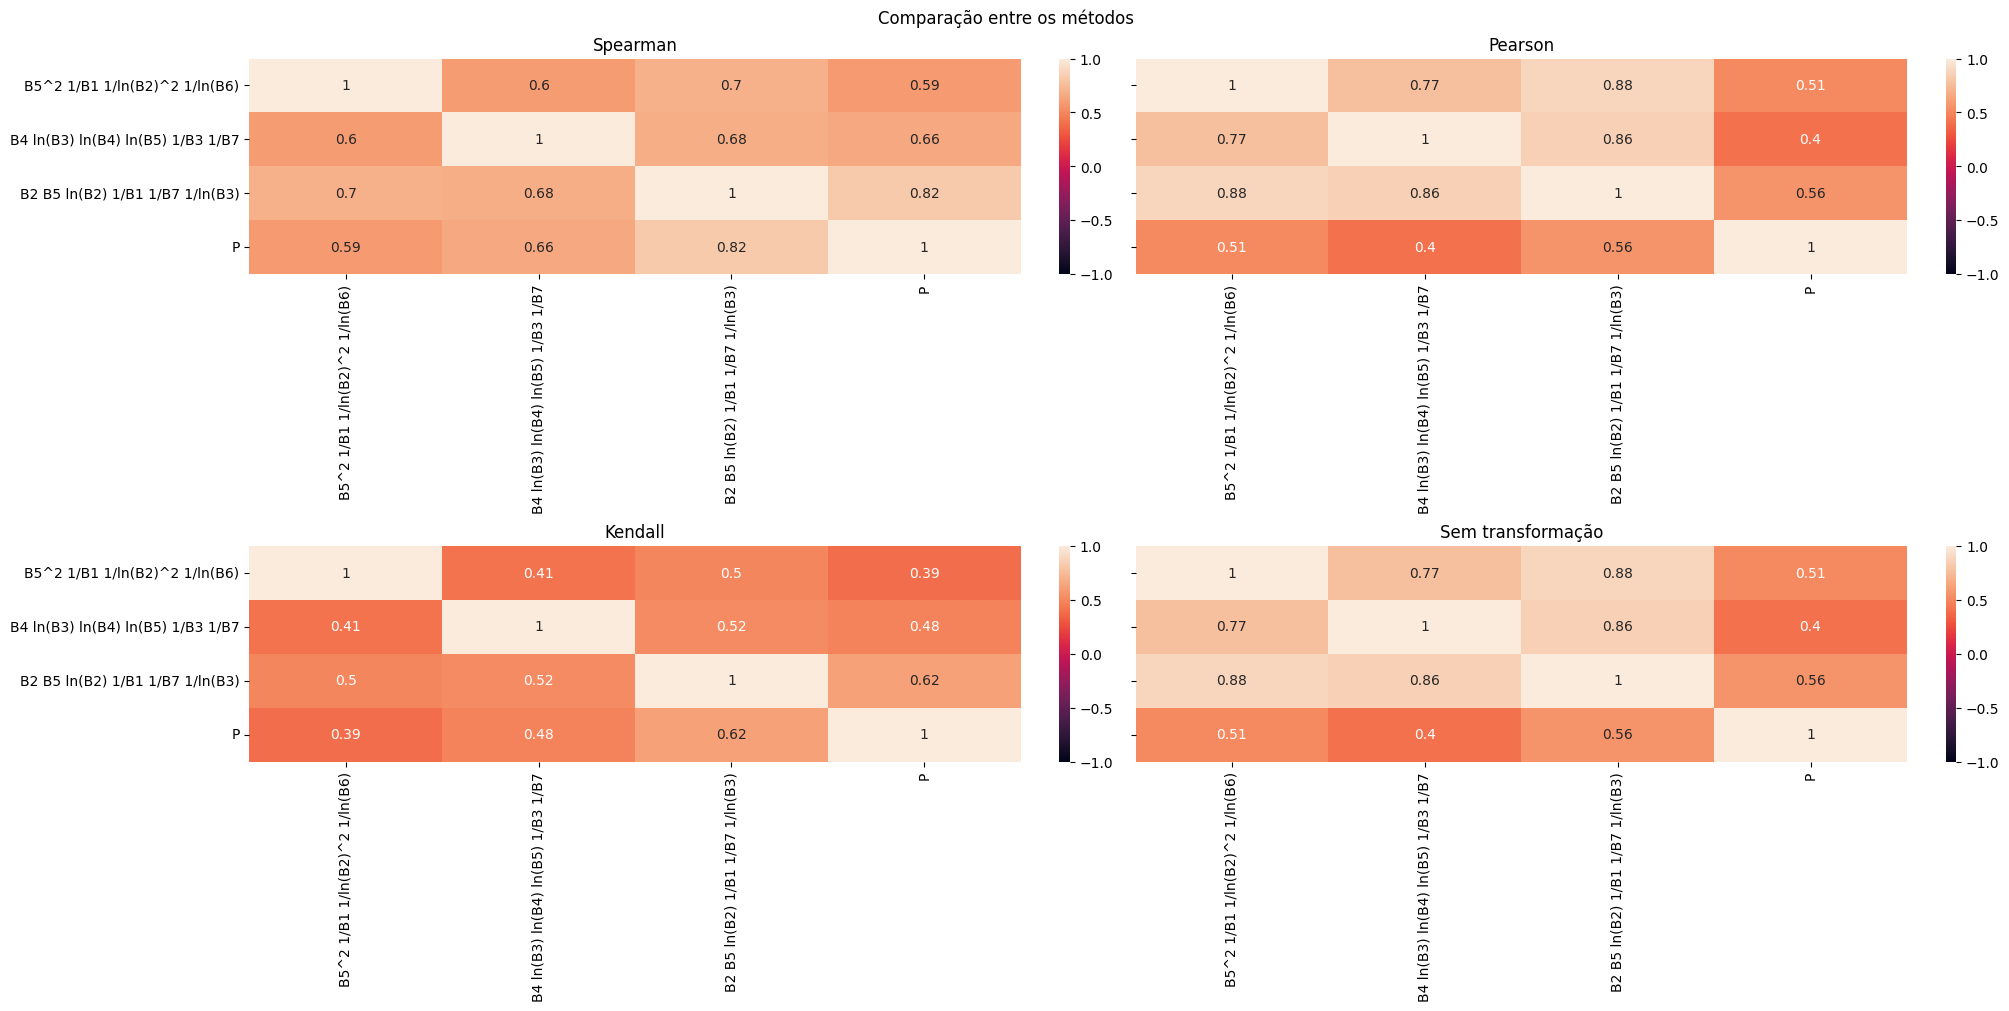

In [ ]:
sns.pairplot(df)
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(20, 10), sharey=True, constrained_layout=True)
fig.suptitle('Comparação entre os métodos')

#Spearman
ax = sns.heatmap(df.corr(method='spearman'), annot=True, vmin=-1, vmax=1, ax = axes[0,0])
axes[0,0].set_title("Spearman")
bottom, top = ax.get_ylim()

#Pearson
ax = sns.heatmap(df.corr(method='pearson'), annot=True, vmin=-1, vmax=1, ax = axes[0,1])
axes[0,1].set_title("Pearson")
bottom, top = ax.get_ylim()

#Kendall
ax = sns.heatmap(df.corr(method='kendall'), annot=True, vmin=-1, vmax=1, ax = axes[1,0])
bottom, top = ax.get_ylim()
axes[1,0].set_title("Kendall")

#Sem transformação
ax = sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, ax = axes[1,1])
axes[1,1].set_title("Sem transformação")
bottom, top = ax.get_ylim()

#3. Algoritmos de regressão

In [ ]:
def plot_results(y_pred, y_tes):
  plt.scatter(range(len(y_pred)), y_pred, c='r')
  plt.plot(range(len(y_tes)), y_tes, linestyle="-", marker="o", label="Expenses")
  plt.title('Model performance - test set')
  plt.ylabel('P medido')
  plt.xlabel('Sample')
  plt.legend(['predicted', 'real'], loc='upper left')
  plt.show()

Antes de implementarmos os modelos de regressão, gostaria de deixar claro que usaremos duas métricas principais para avaliar o desempenho de nossos modelos:



*   Erro percentual médio absoluto (mean absolute percentage error):
\begin{equation}
  MAPE = \frac{1}{n} \sum_{i = 1}^{n} \frac{|y_i - p_i|}{y_i}
\end{equation}

*   Erro médio absoluto (mean absolute error):
\begin{equation}
  MAE = \frac{1}{n} \sum_{i = 1}^{n} |y_i - p_i|
\end{equation}

*   $R^2$ score:
\begin{equation}
  R^2 = NSE = 1 - \frac{\sum_{i=1}^{N} (y_i - p_i)^2}{\sum_{i=1}^{N} (y_i - \bar{y_i})^2}
\end{equation}

Onde, $y_i$ é o valor real,  $p_i$ é o valor predito pelo modelo testado e $\bar{y_i}$ é a média dos valores de $y_i$, $\forall i$.


##3.1. Métodos Lineares

In [ ]:
import sklearn.model_selection as skms
import sklearn.linear_model as sklm
import sklearn as sk
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.metrics import make_scorer

In [ ]:
def train_test_model(model, x_tr, y_tr, x_te, y_te, folds=5):
  kf = KFold(n_splits = folds, random_state = 1, shuffle=True)
  scores = cross_validate(model, x_tr, y_tr, cv=kf,
                        scoring = ('neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2'))

  mae = np.mean(scores['test_neg_mean_absolute_error']*(-1))
  std_mae = np.std(scores['test_neg_mean_absolute_error']*(-1))

  mape = np.mean(scores['test_neg_mean_absolute_percentage_error']*(-1))
  std_mpae = np.std(scores['test_neg_mean_absolute_percentage_error']*(-1))

  r2 = np.mean(scores['test_r2'])
  std_r2 = np.std(scores['test_r2'])

  print('--------------------Validação Cruazada-----------------------')
  print("Média dos valore de MAE: " + str(mae))
  print("Desvio padrão dos valore de MAE: " + str(std_mae) + "\n")

  print("Média dos valore de MAPE: " + str(mape))
  print("Desvio padrão dos valore de MAPE: " + str(std_mpae) + "\n")

  print("Média dos valore de R2: " + str(r2))
  print("Desvio padrão dos valore de R2: " + str(std_r2) + "\n")

  print('--------------------Teste-----------------------')
  model.fit(x_tr, y_tr)
  y_pred = model.predict(x_te)
  print("MAE: " + str(mean_absolute_error(y_te, y_pred)))
  print("MAPE: " + str(mean_absolute_percentage_error(y_te, y_pred)))
  print("R2: " + str(r2_score(y_te, y_pred)))

  plot_results(model.predict(x_te), y_te)

###3.2.1. Regressão Linear

**Teste com 5-Folds**

--------------------Validação Cruazada-----------------------
Média dos valore de MAE: 0.05398944202880539
Desvio padrão dos valore de MAE: 0.03314786690546317

Média dos valore de MAPE: 0.9090928342186991
Desvio padrão dos valore de MAPE: 0.5384413166369808

Média dos valore de R2: -5.194192034579669
Desvio padrão dos valore de R2: 9.075288857713197

--------------------Teste-----------------------
MAE: 0.043731377184255224
MAPE: 0.4692522284373296
R2: 0.3514441185032149


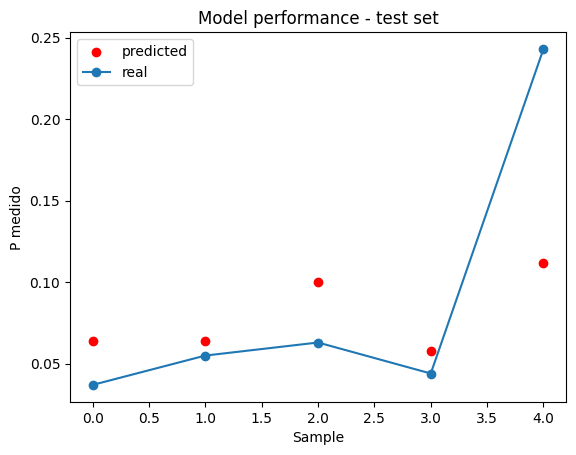

In [ ]:
linear_regressor = sklm.LinearRegression()
train_test_model(linear_regressor, x_tr, y_tr, x_te, y_te, folds=5)

**Teste com 10-Folds**

--------------------Validação Cruazada-----------------------
Média dos valore de MAE: 0.05195618163338202
Desvio padrão dos valore de MAE: 0.025577541596695706

Média dos valore de MAPE: 0.8303765444885727
Desvio padrão dos valore de MAPE: 0.7435595253545956

Média dos valore de R2: -1.9467888890613332
Desvio padrão dos valore de R2: 2.96539219107002

--------------------Teste-----------------------
MAE: 0.06338852022940308
MAPE: 1.1052423196644312
R2: -1.9276921021909885


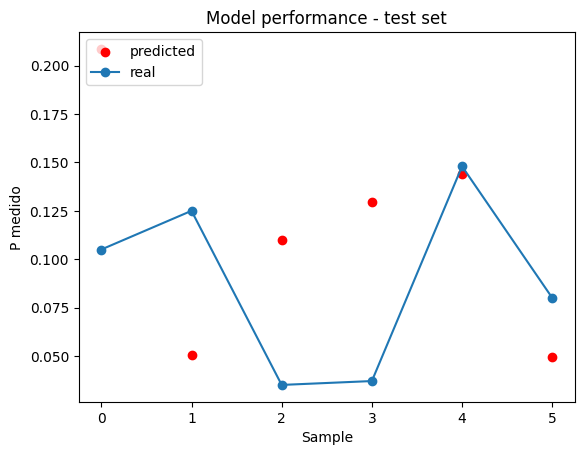

In [ ]:
train_test_model(linear_regressor, x_tr, y_tr, x_te, y_te, folds=10)

In [ ]:
print("Coeficientes da regressão linear: " + str(linear_regressor.coef_))

Coeficientes da regressão linear: [0.48216085 0.00739013 0.2792168 ]


###3.2.2. Rgressão Ridge

In [ ]:
ray.init()

2024-04-18 18:57:54,322	INFO worker.py:1749 -- Started a local Ray instance.


Python version:,3.10.12
Ray version:,2.11.0


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# definindo espaço de busca para os lambdas
lambdas = np.linspace(0, 1000000, 10000)

**Teste com 5-Folds**

In [ ]:
@ray.remote

def test_lambda(lamb):
  # aplicando a regressão
  ridge = sklm.Ridge(alpha = lamb)
  ridge.fit(x_tr, y_tr)             # Fit a ridge regression on the training data

  scores = skms.cross_validate(ridge, x_tr, y_tr, cv=5,
                               scoring=('r2', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'))

  mae = np.mean(scores['test_neg_mean_absolute_error']*(-1))
  mape = np.mean(scores['test_neg_mean_absolute_percentage_error']*(-1))
  r2 = np.mean(scores['test_r2'])

  return [mae, mape, r2]

In [ ]:
result_values = ray.get([test_lambda.remote(i) for i in lambdas])
scores_MAE = [result[0] for result in result_values]
scores_MAPE = [result[1] for result in result_values]
scores_R2 = [result[2] for result in result_values]

Lambda:100.0100010001
Best MAE: 0.054387487873559626
Best MAPE: 0.8851396253377584
R2: -0.16813551612778327


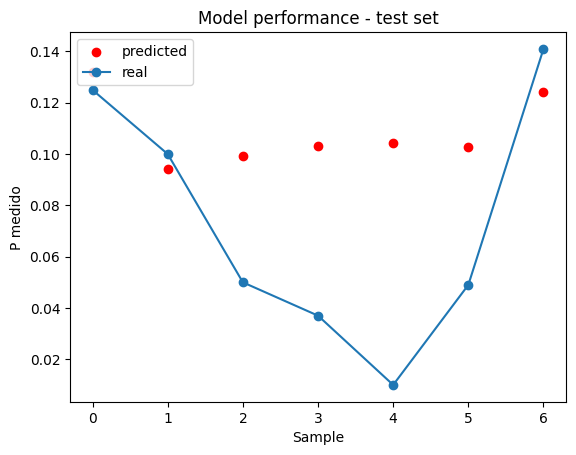

In [ ]:
best_index = scores_MAE.index(min(scores_MAE))

print("Lambda:" + str(lambdas[best_index]))
print("Best MAE: " + str(scores_MAE[best_index]))
print("Best MAPE: " + str(scores_MAPE[best_index]))
print("R2: " + str(scores_R2[best_index]))

ridge = sklm.Ridge(alpha = lambdas[best_index])
ridge.fit(x_tr, y_tr)
plot_results(ridge.predict(x_te), y_te)

**Teste com 10-folds**

In [ ]:
@ray.remote

def test_lambda(lamb):
  # aplicando a regressão
  ridge = sklm.Ridge(alpha = lamb)
  ridge.fit(x_tr, y_tr)             # Fit a ridge regression on the training data

  scores = skms.cross_validate(ridge, x_tr, y_tr, cv=10,
                               scoring=('r2', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'))

  mae = np.mean(scores['test_neg_mean_absolute_error']*(-1))
  mape = np.mean(scores['test_neg_mean_absolute_percentage_error']*(-1))
  r2 = np.mean(scores['test_r2'])

  return [mae, mape, r2]

In [ ]:
result_values = ray.get([test_lambda.remote(i) for i in lambdas])
scores_MAE = [result[0] for result in result_values]
scores_MAPE = [result[1] for result in result_values]
scores_R2 = [result[2] for result in result_values]

Lambda:0.0
Best MAE: 0.05130799133259778
Best MAPE: 0.7754158798293762
R2: -1.9049989954831825


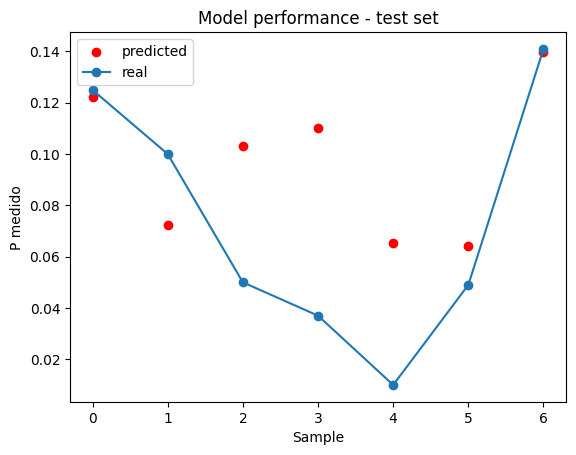

In [ ]:
best_index = scores_MAE.index(min(scores_MAE))

print("Lambda:" + str(lambdas[best_index]))
print("Best MAE: " + str(scores_MAE[best_index]))
print("Best MAPE: " + str(scores_MAPE[best_index]))
print("R2: " + str(scores_R2[best_index]))

ridge = sklm.Ridge(alpha = lambdas[best_index])
ridge.fit(x_tr, y_tr)
plot_results(ridge.predict(x_te), y_te)

In [ ]:
y_pred = ridge.predict(x_te)
print('-----------Teste-------------')
print("MAE: " + str(mean_absolute_error(y_te, y_pred)))
print("MAPE: " + str(mean_absolute_percentage_error(y_te, y_pred)))
print("R2: " + str(r2_score(y_te, y_pred)))

-----------Teste-------------
MAE: 0.03267446127196031
MAPE: 1.3150161715252549
R2: 0.15129736063012067


##3.2 Métodos não lineares

###3.2.1. SVM

In [ ]:
from sklearn import svm

**Teste com 5-Folds**

--------------------Validação Cruazada-----------------------
Média dos valore de MAE: 0.06955557210578706
Desvio padrão dos valore de MAE: 0.014231495738910863

Média dos valore de MAPE: 1.2550835496267776
Desvio padrão dos valore de MAPE: 0.758836082119418

Média dos valore de R2: -1.9342704019158077
Desvio padrão dos valore de R2: 2.8595240342014994

--------------------Teste-----------------------
MAE: 0.07539874891222961
MAPE: 2.8726544040965143
R2: -2.336276381241883


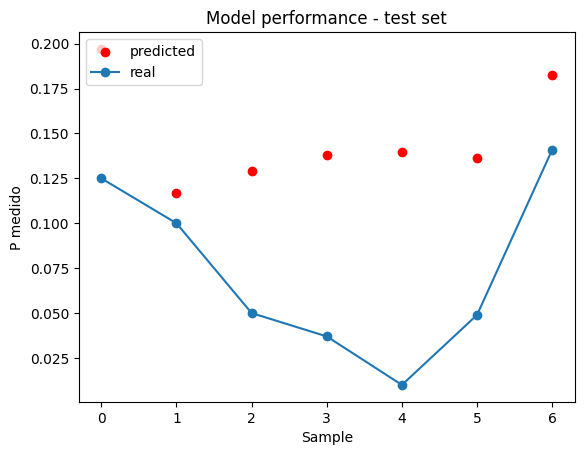

In [ ]:
svm_regressor = svm.SVR()
train_test_model(svm_regressor, x_tr, y_tr, x_te, y_te, folds=5)

**Teste com 10-Folds**

--------------------Validação Cruazada-----------------------
Média dos valore de MAE: 0.06862262563246876
Desvio padrão dos valore de MAE: 0.021269548900730333

Média dos valore de MAPE: 1.2303044196098247
Desvio padrão dos valore de MAPE: 1.051180123862933

Média dos valore de R2: -15.437919073226562
Desvio padrão dos valore de R2: 39.16585479442278

--------------------Teste-----------------------
MAE: 0.07539874891222961
MAPE: 2.8726544040965143
R2: -2.336276381241883


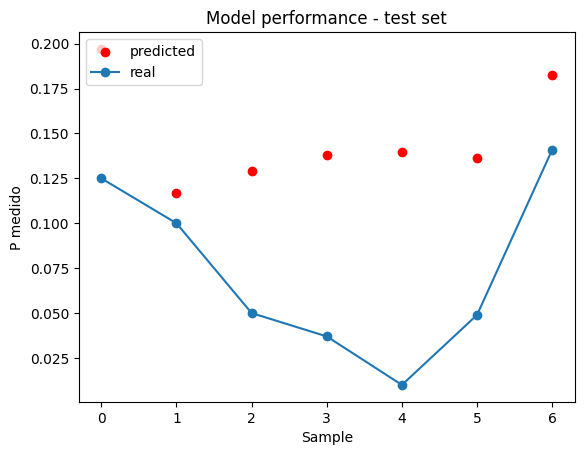

In [ ]:
train_test_model(svm_regressor, x_tr, y_tr, x_te, y_te, folds=10)

###3.2.2. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor as rf

In [ ]:
rf_regressor = rf(n_estimators=1000, random_state=1)
rf_regressor.fit(x_tr, y_tr)

RandomForestRegressor(n_estimators=1000, random_state=1)

**Teste com 5-Folds**

--------------------Validação Cruazada-----------------------
Média dos valore de MAE: 0.05916278911564613
Desvio padrão dos valore de MAE: 0.01956205753435602

Média dos valore de MAPE: 0.8091869571092742
Desvio padrão dos valore de MAPE: 0.505332504008841

Média dos valore de R2: -0.9156446049522419
Desvio padrão dos valore de R2: 1.3530298716045515

--------------------Teste-----------------------
MAE: 0.04041898639455754
MAPE: 1.1121981172495594
R2: -0.029677550313519152


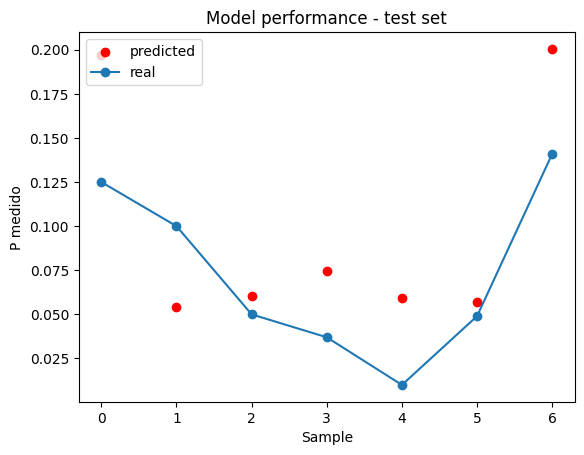

In [ ]:
train_test_model(rf_regressor, x_tr, y_tr, x_te, y_te, folds=5)

**Teste com 10-Folds**

--------------------Validação Cruazada-----------------------
Média dos valore de MAE: 0.05426592896825376
Desvio padrão dos valore de MAE: 0.022557722228932837

Média dos valore de MAPE: 0.7247303979723212
Desvio padrão dos valore de MAPE: 0.6228549186399305

Média dos valore de R2: -4.733526316323074
Desvio padrão dos valore de R2: 10.043556765115683

--------------------Teste-----------------------
MAE: 0.04041898639455754
MAPE: 1.1121981172495594
R2: -0.029677550313519152


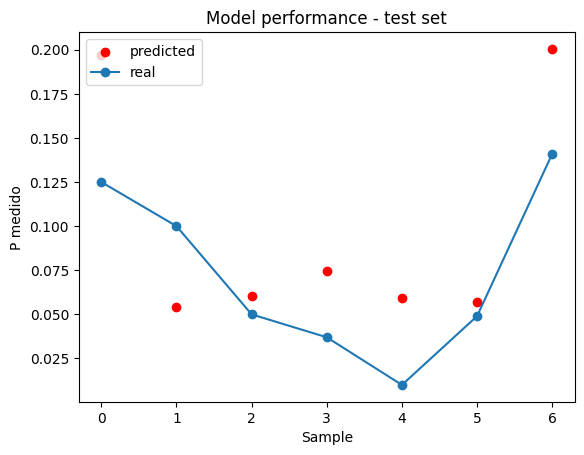

In [ ]:
train_test_model(rf_regressor, x_tr, y_tr, x_te, y_te, folds=10)

###3.2.3 Gradient Boost

In [ ]:
import catboost as cb
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import GridSearchCV
from  sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
grid = {'learning_rate': [0.025, 0.05, 0.1, 0.2, 0.3],
        'max_depth': [2, 3, 5, 7, 10],
        'min_samples_split': [2, 5, 10, 20],
        'max_features': ['log2', 0.25, 'sqrt', 1.0],
        'subsample': [0.15, 0.5, 0.75, 1.0]}

clf = GridSearchCV(GradientBoostingRegressor(n_estimators=200), grid, cv = 10,
                   scoring='neg_root_mean_squared_error')
clf.fit(x_tr, y_tr)
clf.best_params_

KeyboardInterrupt: 

In [ ]:
gb = GradientBoostingRegressor(n_estimators=200,learning_rate=0.025,
 max_depth=3,
 max_features='log2',
 min_samples_split=2,
 subsample=0.15
)


train_test_model(gb, x_tr, y_tr, x_te, y_te, folds=10)

### 3.2.4 CatBoost

In [ ]:
grid = {'learning_rate': [0.025, 0.05, 0.1, 0.2, 0.3],
        'max_depth': [3, 6, 9],
        'leaf_estimation_iterations': [1, 10],
        'l2_leaf_reg': [1, 3, 6, 9]}

clf = GridSearchCV(CatBoostRegressor(iterations=200), grid, cv = 10,
                   scoring='neg_root_mean_squared_error')
clf.fit(x_tr, y_tr)
clf.best_params_

A saída de streaming foi truncada nas últimas 5000 linhas.
0:	learn: 0.0690864	total: 644us	remaining: 128ms
1:	learn: 0.0594920	total: 1.9ms	remaining: 188ms
2:	learn: 0.0551818	total: 2.74ms	remaining: 180ms
3:	learn: 0.0515792	total: 3.51ms	remaining: 172ms
4:	learn: 0.0482991	total: 4.16ms	remaining: 162ms
5:	learn: 0.0455793	total: 4.94ms	remaining: 160ms
6:	learn: 0.0450180	total: 5.56ms	remaining: 153ms
7:	learn: 0.0435344	total: 6.23ms	remaining: 149ms
8:	learn: 0.0429881	total: 6.76ms	remaining: 144ms
9:	learn: 0.0410664	total: 7.58ms	remaining: 144ms
10:	learn: 0.0373836	total: 8.38ms	remaining: 144ms
11:	learn: 0.0345858	total: 9.21ms	remaining: 144ms
12:	learn: 0.0320200	total: 9.88ms	remaining: 142ms
13:	learn: 0.0305844	total: 10.5ms	remaining: 139ms
14:	learn: 0.0271212	total: 11ms	remaining: 136ms
15:	learn: 0.0264606	total: 11.5ms	remaining: 133ms
16:	learn: 0.0247239	total: 12.1ms	remaining: 130ms
17:	learn: 0.0228351	total: 12.6ms	remaining: 127ms
18:	learn: 0.021213

{'l2_leaf_reg': 1,
 'leaf_estimation_iterations': 10,
 'learning_rate': 0.3,
 'max_depth': 6}

0:	learn: 0.0600020	total: 739us	remaining: 147ms
1:	learn: 0.0495890	total: 2.8ms	remaining: 277ms
2:	learn: 0.0389910	total: 3.67ms	remaining: 241ms
3:	learn: 0.0301700	total: 4.7ms	remaining: 230ms
4:	learn: 0.0252739	total: 5.67ms	remaining: 221ms
5:	learn: 0.0214555	total: 6.5ms	remaining: 210ms
6:	learn: 0.0182567	total: 7.28ms	remaining: 201ms
7:	learn: 0.0159731	total: 8.33ms	remaining: 200ms
8:	learn: 0.0144544	total: 9.1ms	remaining: 193ms
9:	learn: 0.0138117	total: 9.76ms	remaining: 185ms
10:	learn: 0.0121307	total: 10.4ms	remaining: 179ms
11:	learn: 0.0112383	total: 11ms	remaining: 172ms
12:	learn: 0.0101774	total: 11.5ms	remaining: 166ms
13:	learn: 0.0089324	total: 12.2ms	remaining: 161ms
14:	learn: 0.0083407	total: 12.9ms	remaining: 159ms
15:	learn: 0.0075212	total: 13.8ms	remaining: 158ms
16:	learn: 0.0070403	total: 14.6ms	remaining: 158ms
17:	learn: 0.0058687	total: 15.3ms	remaining: 155ms
18:	learn: 0.0056360	total: 16ms	remaining: 152ms
19:	learn: 0.0048398	total: 16.

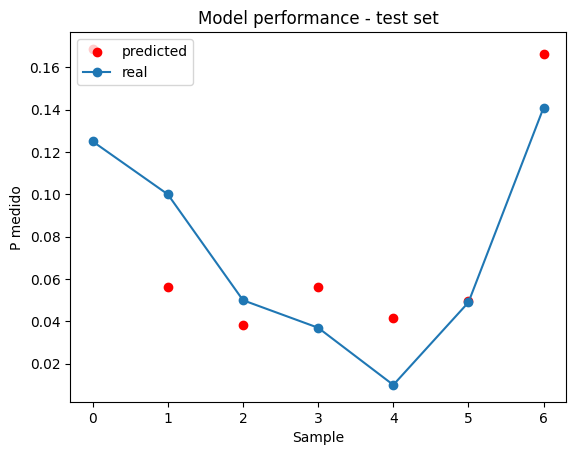

In [ ]:
ctb = CatBoostRegressor(n_estimators=200,l2_leaf_reg= 1,
 leaf_estimation_iterations= 10,
 learning_rate= 0.3,
 max_depth= 6)


train_test_model(ctb, x_tr, y_tr, x_te, y_te, folds=10)

In [ ]:
ctb.get_feature_importance(prettified=True)

,Feature Id,Importances
0,B5 ln(B3) 1/B2 1/ln(B1),49.614822
1,ln(B2)^2 ln(B3) 1/B1,26.085089
2,B5 ln(B6) 1/B7^2,24.300089


### 3.2.5 XGBoost

In [ ]:
grid = {'learning_rate': [0.025, 0.05, 0.1, 0.2, 0.3],
        'max_depth': [2, 3, 5, 7, 10, 100],
        'gamma':[0, 0.1, 0.2, 0.3, 0.4, 1.0, 1.5, 2.0],
        'colsample_bylevel': ['log2', 'sqrt', 0.25, 1.0],
        'subsample': [0.15, 0.5, 0.75, 1.0]}

clf = GridSearchCV(XGBRegressor(n_estimators=200), grid, cv = 10,
                   scoring='neg_root_mean_squared_error')
clf.fit(x_tr, y_tr)
clf.best_params_

In [ ]:
xgb = XGBRegressor(n_estimators=200,colsample_bylevel=0.25,
 gamma=0,
 learning_rate=0.025,
 max_depth=10,
 subsample=0.15
)


train_test_model(ctb, x_tr, y_tr, x_te, y_te, folds=10)

In [ ]:
%%capture
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%%writefile no_code.tpl
{% extends 'article.tplx' %}

{% block input_group %}
{% endblock input_group %}

In [ ]:
!cp /content/drive/MyDrive/CNN_Chagas/fosforo/Cópia_de_Analise_fosforo.ipynb ./

In [ ]:
!jupyter nbconvert --to pdf  "Cópia_de_Analise_fosforo.ipynb"